In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


import warnings
warnings.filterwarnings('ignore')

In [2]:
advert_d = pd.read_csv('./datasets/Advertising.csv')
advert_d

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
advert_d.shape

(200, 5)

In [4]:
advert_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advert_d.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
advert_d.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


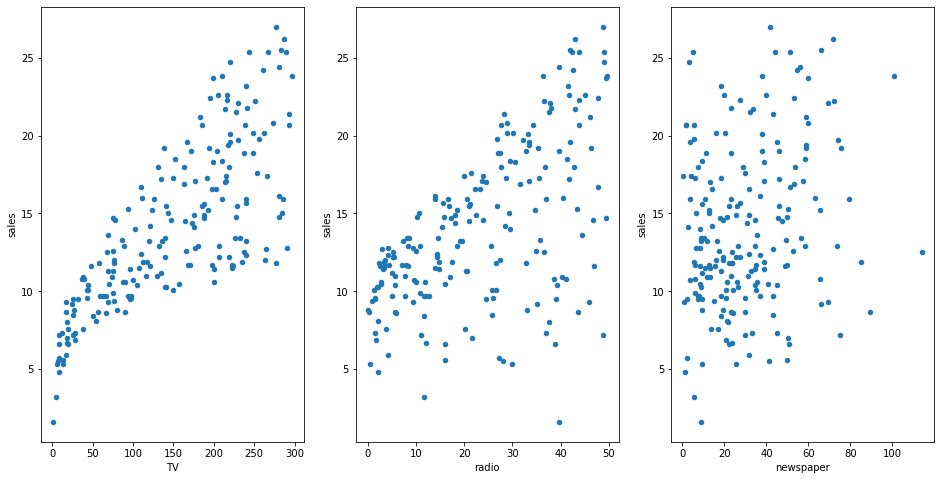

In [7]:
#visualization
fig,axs = plt.subplots(1,3)
advert_d.plot(kind = 'scatter' , x = 'TV' , y = 'sales' , ax = axs[0] , figsize = (16,8))
advert_d.plot(kind = 'scatter' ,x = 'radio' , y ='sales',ax =axs[1])
advert_d.plot(kind = 'scatter' ,x= 'newspaper', y='sales',ax = axs[2])
fig.savefig('advert_d.jpg')

In [8]:
correal = advert_d.corr()

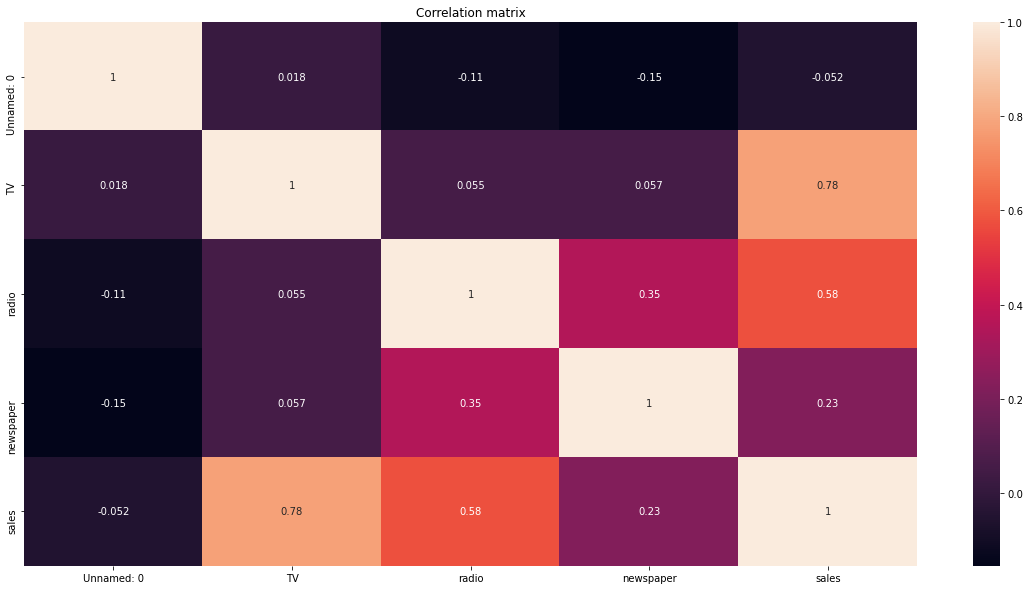

In [9]:
plt.figure(figsize=[20,10])
sns.heatmap(correal,annot=True)
plt.title("Correlation matrix")
plt.show()

### sales is highly relative with "TV" 

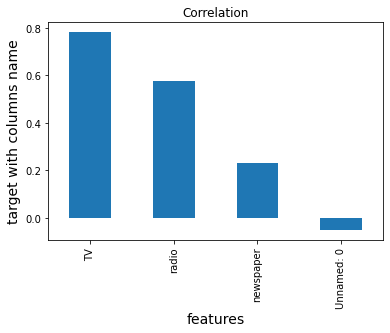

In [23]:
correal['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar')
plt.xlabel('features',fontsize=14)
plt.ylabel('target with columns name',fontsize=14)
plt.title('Correlation')
plt.show()

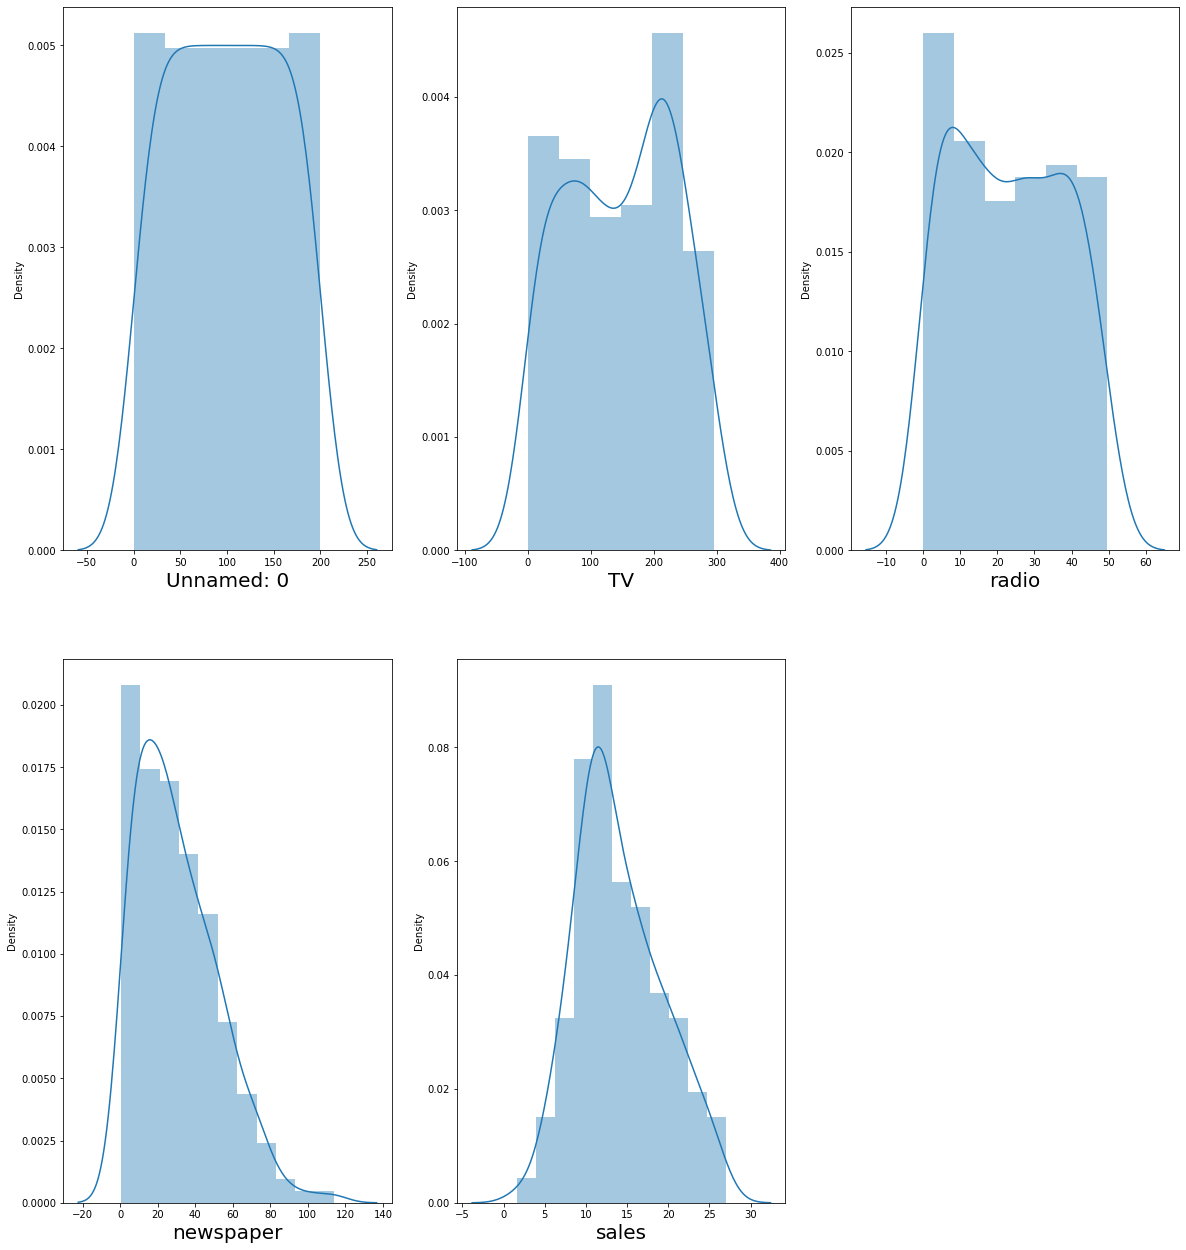

In [10]:
#check for skewness
plt.figure(figsize=(20,22))
plotnumber = 1
for i in advert_d:
    if plotnumber<=5:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(advert_d[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.show()

In [11]:
#drop the column unnamed
advert_d = advert_d.drop(columns='Unnamed: 0',axis=1)

In [12]:
advert_d.shape

(200, 4)

In [13]:
advert_d.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In [14]:
#reducing skewness
scaler = PowerTransformer(method ='yeo-johnson')
for i in advert_d:
    advert_d[i] = scaler.fit_transform(advert_d[i].values.reshape(-1,1))
advert_d

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,1.464412
1,-1.191314,1.040179,0.787683,-0.650693
2,-1.647757,1.370710,1.516998,-0.894550
3,0.141020,1.142387,1.214656,0.882528
4,0.452715,-0.748651,1.211704,-0.134550
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,-1.296912
196,-0.520949,-1.297017,-1.142011,-0.804523
197,0.413091,-0.875492,-1.313050,-0.154314
198,1.455843,1.177722,1.433350,1.975967


In [15]:
advert_d.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
sales       -0.007841
dtype: float64

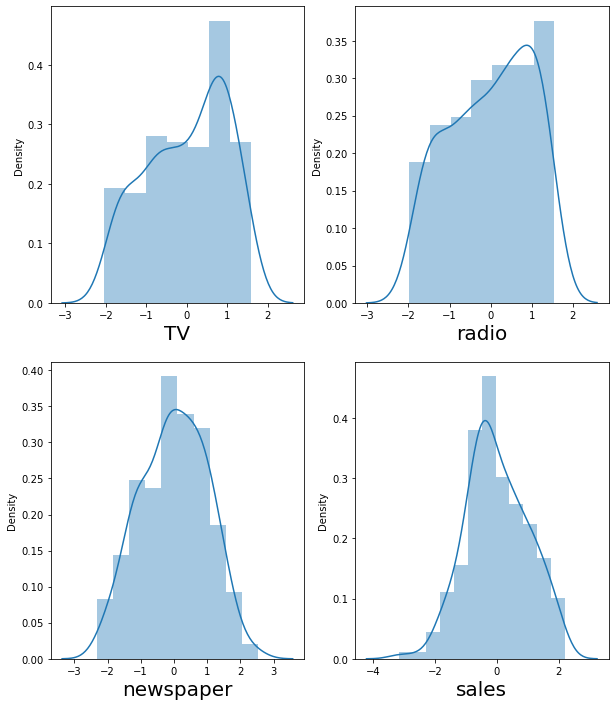

In [16]:
#check for skewness
plt.figure(figsize=(10,12))
plotnumber = 1
for i in advert_d:
    if plotnumber<=5:
        ax= plt.subplot(2,2,plotnumber)
        sns.distplot(advert_d[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.show()

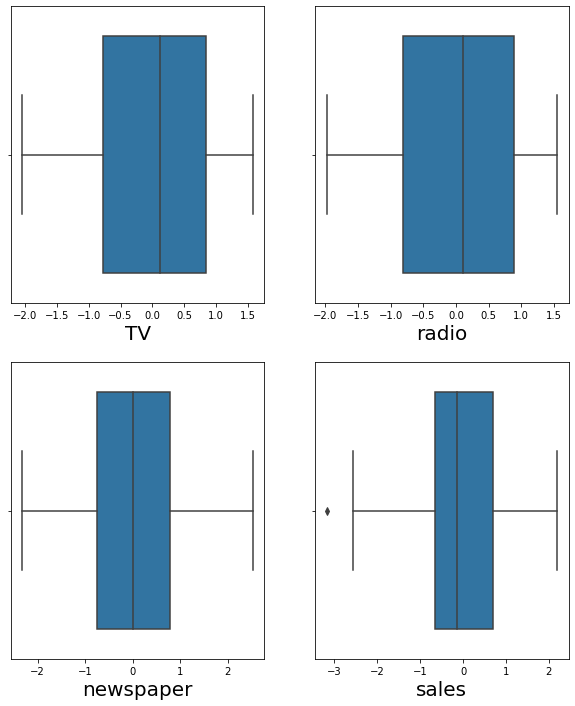

In [17]:
#check for outliers
plt.figure(figsize=(10,12))
plotnumber = 1
for i in advert_d:
    if plotnumber<=4:
        ax= plt.subplot(2,2,plotnumber)
        sns.boxplot(advert_d[i])
        plt.xlabel(i,fontsize=20)
    plotnumber +=1
plt.show()

#### no outliers present.sales column has 1 outlier but it is target one. 

In [18]:
#dividing target and feature values
x = advert_d.drop(columns='sales')
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [19]:
y = advert_d['sales']
y

0      1.464412
1     -0.650693
2     -0.894550
3      0.882528
4     -0.134550
         ...   
195   -1.296912
196   -0.804523
197   -0.154314
198    1.975967
199   -0.036715
Name: sales, Length: 200, dtype: float64

In [28]:
#data scaling
mms =MinMaxScaler()
x_scaled = mms.fit_transform(x)

In [25]:
#vif
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['feature'] = x.columns

vif

,vif,feature
0,1.003112,TV
1,1.094332,radio
2,1.093766,newspaper


In [53]:
#tunning parameters
lr =LinearRegression()
train =[]
test = []
for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train.append(r2_score(y_train,pred_train))
    test.append(r2_score(y_test,pred_test))
data = pd.DataFrame({'Trained':train,'Test':test})
data

,Trained,Test
0,0.923558,0.860958
1,0.902351,0.926896
2,0.941576,0.792532
3,0.923847,0.868607
4,0.901677,0.927881
5,0.909623,0.904142
6,0.902534,0.933379
7,0.902612,0.924317
8,0.925786,0.853477
9,0.902336,0.926553


In [61]:
# Fit the resgression line using 'OLS'
import statsmodels.api as sm

lm = sm.OLS(y_train, x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.307
Method:                 Least Squares   F-statistic:                              23.19
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                    2.40e-12
Time:                        23:45:23   Log-Likelihood:                         -188.28
No. Observations:                 150   AIC:                                      382.6
Df Residuals:                     147   BIC:                                      391.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3712      0.216      6.362      0.000       0.945       1.797
x2             0.6353      0.235      2.698      0.008       0.170       1.101
x3            -1.8919      0.294     -6.432      0.000      -2.473      -1.311
==============================================================================
Omnibus:                        3.642   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                4.184
Skew:                          -0.078   Prob(JB):                        0.123
Kurtosis:                       3.803   Cond. No.                         4.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=5)
lr.fit(x_train,y_train)

LinearRegression()

In [55]:
pred_=lr.predict(x_test)
pred_

array([-1.43874943,  0.0537527 , -0.49521779, -0.7943045 ,  0.40314196,
       -0.59586829, -0.07920177, -0.44510387,  1.08548836, -0.47863566,
        0.89778554, -1.26781387,  0.19107086,  0.59004745,  1.30437128,
        1.17453605,  0.71376055,  1.22540991, -1.49477867, -0.49949491,
       -0.62902522,  0.27486172,  1.22955395,  0.1219045 ,  1.09544858,
        1.40040317, -0.0337696 ,  1.69629051, -1.23563802,  1.24684002,
        0.2908736 ,  0.23405052,  1.39223463,  0.92637803, -0.20425223,
       -0.79787589, -1.72978772, -0.2172296 ,  1.05394482, -1.03693833,
       -0.13107917,  0.64723148, -0.82194212,  0.37264877,  0.61037557,
       -0.40359569,  0.33346139,  0.58500057,  0.20770539, -0.92770976])

In [56]:
print(r2_score(y_test,pred_))

0.904141799499916


In [59]:
#SVR
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)

print(r2_score(y_test,pred_svr))

0.9847909062719671


In [64]:
#cross_validation 
from sklearn.model_selection import cross_val_score

crv = cross_val_score(lr,x,y,cv=10)
print("Cross validation score of LinearRegression Model",crv.mean(),"\n")

crv = cross_val_score(svr,x,y,cv=10)
print("Cross validation score of SVR Model",crv.mean(),"\n")



Cross validation score of LinearRegression Model 0.9021422918437463 

Cross validation score of SVR Model 0.9593187601853865 



In [65]:
#saving the model in pickle format
import joblib
joblib.dump(cross_val_score,"titanic.pkl")

['titanic.pkl']